In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

transaction_summary = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'ProductID': 'nunique'
}).reset_index()

transaction_summary.rename(columns={
    'TotalValue': 'TotalSpending',
    'Quantity': 'TotalQuantity',
    'ProductID': 'UniqueProducts'
}, inplace=True)

data = pd.merge(customers, transaction_summary, on='CustomerID', how='left')
data.fillna(0, inplace=True)


features = ['TotalSpending', 'TotalQuantity', 'UniqueProducts']
X = data[features].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score


n_clusters = 4


kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


data['Cluster'] = clusters

db_index = davies_bouldin_score(X_scaled, clusters)
silhouette_avg = silhouette_score(X_scaled, clusters)

print(f"DB Index: {db_index}")
print(f"Silhouette Score: {silhouette_avg}")


DB Index: 0.8492343358515362
Silhouette Score: 0.3684880816105581


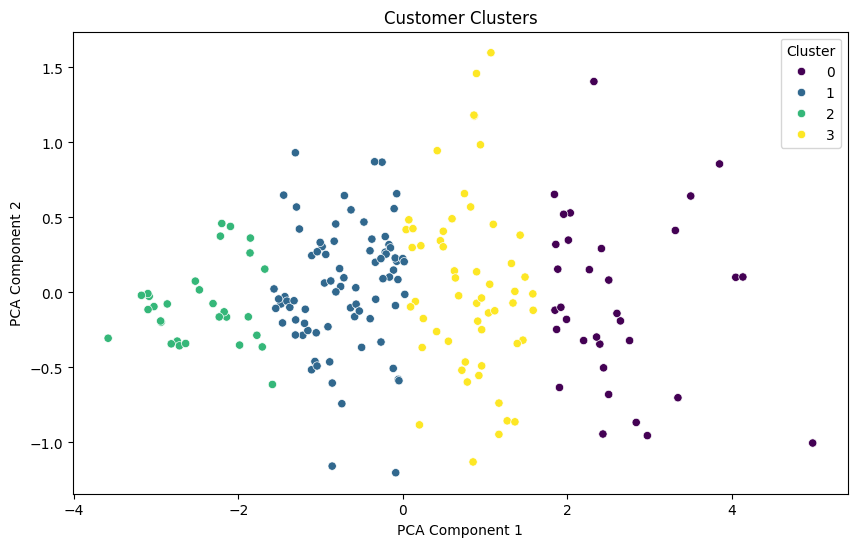

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['Cluster'], palette='viridis')
plt.title("Customer Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()
